<a href="https://colab.research.google.com/github/RISA-source/Concepts_Of_AI-WorkSheets/blob/main/Workshop_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/aidata/week2/Copy of diabetes_.csv")

print(df.head())
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose               

In [5]:
# Replace invalid zeros with NaN
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Separate features and labels
X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

# Custom train-test split
def train_test_split_scratch(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split = int(len(X) * test_size)
    test_idx = indices[:split]
    train_idx = indices[split:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)


In [8]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict_single(query, X_train, y_train, k):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_idx = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_idx]
    return np.bincount(nearest_labels).argmax()

def knn_predict(X_test, X_train, y_train, k):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)

print(f"Accuracy (Unscaled Data, k=3): {accuracy:.2f}%")


Accuracy (Unscaled Data, k=3): 70.00%


In [9]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_scaled = standardize(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)



pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, pred_scaled)

print(f"Accuracy (Scaled Data, k=3): {accuracy_scaled:.2f}%")


Accuracy (Scaled Data, k=3): 67.83%


In [10]:
import time

def experiment_k(X_train, y_train, X_test, y_test, k_values):
    acc = []
    times = []

    for k in k_values:
        start = time.time()
        preds = knn_predict(X_test, X_train, y_train, k)
        elapsed = time.time() - start

        acc.append(compute_accuracy(y_test, preds))
        times.append(elapsed)

    return acc, times

k_values = range(1, 16)

acc_orig, time_orig = experiment_k(X_train, y_train, X_test, y_test, k_values)
acc_scaled, time_scaled = experiment_k(X_train_s, y_train_s, X_test_s, y_test_s, k_values)


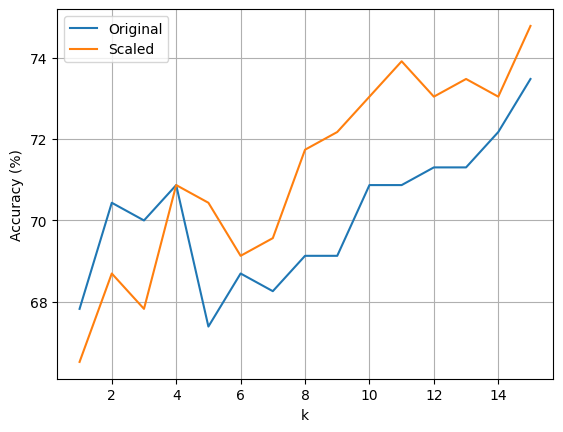

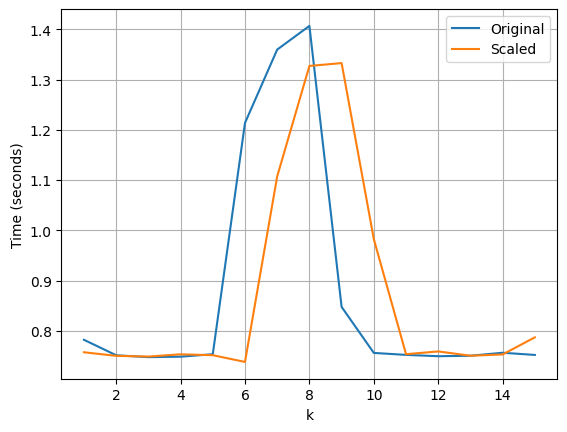

In [11]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure()
plt.plot(k_values, acc_orig, label="Original")
plt.plot(k_values, acc_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()
plt.show()

# Time plot
plt.figure()
plt.plot(k_values, time_orig, label="Original")
plt.plot(k_values, time_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid()
plt.show()
